In [1]:
pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import glob
import numpy as np
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import plotly.graph_objects as go
from google.colab import files
from google.colab import drive

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
csv_files = ["/content/drive/My Drive/AllTrainDataset/GSE10950_gene_expression_renamed.csv",
             "/content/drive/My Drive/AllTrainDataset/GSE25070_gene_expression_renamed.csv",
             "/content/drive/My Drive/AllTrainDataset/GSE41328_gene_expression_renamed.csv",
             "/content/drive/My Drive/AllTrainDataset/GSE74602_gene_expression_renamed.csv",
             "/content/drive/My Drive/AllTrainDataset/GSE44861_gene_expression_renamed.csv",
             "/content/drive/My Drive/AllTrainDataset/GSE113513_gene_expression_renamed.csv",
             "/content/drive/My Drive/AllTrainDataset/GSE110223_gene_expression_renamed.csv"]

dfs = [pd.read_csv(file, index_col=0) for file in csv_files]

Filter common columns

In [9]:
column_sets = [set(df.columns) for df in dfs]

common_columns = set.intersection(*column_sets)

common_unique_columns = sorted(common_columns)

print(f"Total unique common columns: {len(common_unique_columns)}")
print("Common Unique Columns:", common_unique_columns)

Total unique common columns: 10560
Common Unique Columns: ['A2M', 'A4GALT', 'A4GNT', 'AAAS', 'AACS', 'AADAC', 'AAK1', 'AAMP', 'AANAT', 'AARS', 'AASDHPPT', 'AASS', 'AATF', 'ABAT', 'ABAT.1', 'ABCA1', 'ABCA12', 'ABCA2', 'ABCA2.1', 'ABCA3', 'ABCA4', 'ABCA5', 'ABCA6', 'ABCA7', 'ABCA8', 'ABCB1', 'ABCB11', 'ABCB4', 'ABCB7', 'ABCB8', 'ABCB9', 'ABCB9.1', 'ABCC1', 'ABCC10', 'ABCC2', 'ABCC3', 'ABCC4', 'ABCC5', 'ABCC8', 'ABCC9', 'ABCC9.1', 'ABCD1', 'ABCD2', 'ABCD4', 'ABCD4.1', 'ABCE1', 'ABCF1', 'ABCF2', 'ABCF2.1', 'ABCF2.2', 'ABCF3', 'ABCG1', 'ABCG1.1', 'ABCG2', 'ABCG4', 'ABCG5', 'ABHD10', 'ABHD11', 'ABHD2', 'ABHD2.1', 'ABHD3', 'ABHD4', 'ABHD5', 'ABHD6', 'ABHD8', 'ABI1', 'ABI1.1', 'ABI2', 'ABI2.1', 'ABI3BP', 'ABL1', 'ABL2', 'ABLIM1', 'ABLIM1.1', 'ABLIM3', 'ABO', 'ABR', 'ABR.1', 'ABT1', 'ABTB2', 'ACAA1', 'ACAA2', 'ACACA', 'ACACA.1', 'ACACB', 'ACAD10', 'ACAD8', 'ACADL', 'ACADM', 'ACADS', 'ACADSB', 'ACADVL', 'ACAT1', 'ACAT2', 'ACBD3', 'ACBD4', 'ACD', 'ACE', 'ACE2', 'ACHE', 'ACHE.1', 'ACIN1', 'ACLY', 

Merge on sample

In [10]:
df_merged = pd.concat(dfs, axis=0, join="inner")

print(f"Merged shape: {df_merged.shape}")

Merged shape: (345, 10560)


In [11]:
df_merged.head()

,target,EEF1A1,TUBB,TXN,ACTB,PDCD1LG2,RPS28,IPO13,CDT1,LPP,...,EIF5.2,FCHSD2,SOX4,CTDP1,TSSC1,ERCC2,NANS,NUP107,TRPM3.1,SMAD7
geo_accession,,,,,,,,,,,,,,,,,,,,,
GSM277495,0,56190.14,1971.4430,16093.71,54993.97,5.684647,31040.54,223.2116,35.27089,8473.877,...,1442.851,500.1508,426.4089,224.5241,325.8868,106.7903,2146.7830,419.1906,8.302612,624.81980
GSM277496,1,52176.93,606.7773,18485.05,46674.46,18.281510,30282.59,221.1387,468.34940,5391.271,...,1075.820,466.3895,1563.1800,142.0106,884.8263,163.7416,2197.3660,1017.3650,-7.676422,89.04105
GSM277497,0,50483.09,8916.9360,10451.59,48284.97,13.904390,26012.85,431.4342,82.57671,27863.030,...,1097.349,880.9092,590.7308,129.5548,356.1988,123.5126,852.3802,619.0782,4.253619,331.57000
GSM277498,1,38690.04,3148.3370,23610.13,36091.75,1.182301,25750.38,178.7281,580.13820,5325.731,...,1370.258,225.3230,1438.3140,158.0576,641.2169,117.6412,1398.1140,1847.4700,-4.145857,222.88310
GSM277499,0,54803.84,3906.8750,11740.43,62380.23,18.286430,28069.13,376.0385,93.08880,20692.270,...,1063.625,464.9128,535.5609,271.1810,358.9363,271.9331,2109.5700,462.7539,-9.525824,307.97920


In [12]:
df_merged.to_csv("df_merged.csv", index=False)


In [13]:
new_df = pd.read_csv("df_merged.csv")

In [14]:
new_df.shape

(345, 10560)

In [ ]:
class_counts = df_merged["target"].value_counts()
print(class_counts)

target
1    173
0    172
Name: count, dtype: int64


In [ ]:
class_counts = pd.Series({0: 172, 1: 173}, name="count")
df_plot = class_counts.reset_index()
df_plot.columns = ['target', 'count']
label_map = {0: 'Normal', 1: 'CRC'}
df_plot['label'] = df_plot['target'].map(label_map)

x_vals = [0, 0.5]

fig = go.Figure(data=[
    go.Bar(
        x=x_vals,
        y=df_plot['count'],
        text=df_plot['count'],
        textposition='outside',
        marker_color=['#636EFA', '#EF553B'],
        width=0.1
    )
])

fig.update_layout(
    title='Class Distribution: Normal vs CRC',
    xaxis=dict(
        tickmode='array',
        tickvals=x_vals,
        ticktext=df_plot['label'],
        title='Class'
    ),
    yaxis_title='Number of Samples',
    template='plotly_white'
)

fig.show()

In [ ]:
fig.write_image("class_distribution.png", width=600, height=400)

In [ ]:
files.download("class_distribution.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download("target_class.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
duplicate_genes = df_merged.columns[df_merged.columns.duplicated()]
print(f"Duplicated gene names: {list(duplicate_genes)}")

Duplicated gene names: []


In [ ]:
genes = df_merged.drop(columns=["target"])
target = df_merged["target"]

In [ ]:
cancer_samples = genes[target == 1]   # 1 for cancer
non_cancer_samples = genes[target == 0]  # 0 for normal

Perform independent t-test for each gene

In [ ]:
p_values = []
log2_fold_changes = []

for gene in cancer_samples.columns:
    cancer_values = cancer_samples[gene].values
    non_cancer_values = non_cancer_samples[gene].values

    t_stat, p_val = ttest_ind(cancer_values, non_cancer_values, nan_policy='omit')

    mean_cancer = np.mean(cancer_values)
    mean_non_cancer = np.mean(non_cancer_values)
    log2_fc = np.log2((mean_cancer + 1e-6) / (mean_non_cancer + 1e-6))

    p_values.append(p_val)
    log2_fold_changes.append(log2_fc)

deg_results = pd.DataFrame({
    "Gene": cancer_samples.columns,
    "log2FC": log2_fold_changes,
    "p-value": p_values
})

# Adjust p-values using Benjamini-Hochberg correction
deg_results["adj_p-value"] = multipletests(deg_results["p-value"], method='fdr_bh')[1]

print("Total DEGs: ", deg_results.shape)
print(deg_results.sort_values(by="adj_p-value").head())

Total DEGs:  (10559, 4)
        Gene    log2FC       p-value  adj_p-value
4062    CDH3  4.332302  8.409006e-10     0.000009
2171    AFF3 -1.698945  2.313614e-09     0.000012
10321  ADH1B -3.243332  6.290958e-09     0.000013
9537   ABCA8 -3.842983  5.472883e-09     0.000013
4365    LIFR -2.971019  4.152577e-09     0.000013


Define significance thresholds

In [ ]:
log2fc_threshold = 1
p_value_threshold = 0.05  # Statistically significant

Filter DEGs

In [ ]:
significant_degs = deg_results[
    (abs(deg_results["log2FC"]) > log2fc_threshold) & (deg_results["adj_p-value"] < p_value_threshold)
]

print("Significant DEGs Quantiry:", significant_degs.shape)
print("Significant DEGs:\n", significant_degs)

Significant DEGs Quantiry: (1471, 4)
Significant DEGs:
          Gene    log2FC   p-value  adj_p-value
1        TUBB -1.689177  0.000362     0.004818
7        CDT1  1.990346  0.000011     0.000612
8         LPP -1.776559  0.000922     0.009398
9        UGP2 -1.259684  0.004785     0.031507
24       MFN2 -1.370978  0.004161     0.028236
...       ...       ...       ...          ...
10526  CCDC68 -1.442749  0.000049     0.001305
10544    CD46  1.141880  0.000970     0.009707
10548   PLCG2 -1.195216  0.002489     0.019398
10551    SOX4  1.918485  0.000212     0.003371
10556  NUP107  1.076457  0.000989     0.009817

[1471 rows x 4 columns]


Log2 Fold Change threshold (|log2FC| > 1)

In [ ]:
log2fc_threshold = 1
p_value_threshold = 0.05

Identify upregulated genes (log2FC > 1 and adj p-value < 0.05)

In [ ]:
upregulated_genes = deg_results[
    (deg_results["log2FC"] > log2fc_threshold) & (deg_results["adj_p-value"] < p_value_threshold)
]

Identify downregulated genes (log2FC < -1 and adj p-value < 0.05)

In [ ]:
downregulated_genes = deg_results[
    (deg_results["log2FC"] < -log2fc_threshold) & (deg_results["adj_p-value"] < p_value_threshold)
]

In [ ]:
print(f"Upregulated Genes: {len(upregulated_genes)}")
print(upregulated_genes.head())

print(f"Downregulated Genes: {len(downregulated_genes)}")
print(downregulated_genes.head())

Upregulated Genes: 564
       Gene    log2FC   p-value  adj_p-value
7      CDT1  1.990346  0.000011     0.000612
87   CDC25B  1.819140  0.000874     0.009077
125    GJB3  1.731946  0.000215     0.003400
132    RAC1  1.251719  0.001532     0.013495
142   POLD1  1.174322  0.001347     0.012296
Downregulated Genes: 907
         Gene    log2FC   p-value  adj_p-value
1        TUBB -1.689177  0.000362     0.004818
8         LPP -1.776559  0.000922     0.009398
9        UGP2 -1.259684  0.004785     0.031507
24       MFN2 -1.370978  0.004161     0.028236
40  HIST1H2BD -1.058805  0.006919     0.041134


In [ ]:
significant_degs.shape

(1471, 4)

In [ ]:
upregulated_genes.shape

(564, 4)

In [ ]:
downregulated_genes.shape

(907, 4)

In [ ]:
significant_degs.to_csv("DEGs.csv", index=False)
files.download("DEGs.csv")

upregulated_genes.to_csv("Upregulated_DEGs.csv", index=False)
files.download("Upregulated_DEGs.csv")
downregulated_genes.to_csv("Downregulated_DEGs.csv", index=False)
files.download("Downregulated_DEGs.csv")


print("DEG results saved!")
print(f"Upregulated Genes: {len(upregulated_genes)} saved in 'DEGs_upregulated.csv'")
print(f"Downregulated Genes: {len(downregulated_genes)} saved in 'DEGs_downregulated.csv'")
print(f"Full DEG list saved in 'DEGs_all.csv'")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

DEG results saved!
Upregulated Genes: 564 saved in 'DEGs_upregulated.csv'
Downregulated Genes: 907 saved in 'DEGs_downregulated.csv'
Full DEG list saved in 'DEGs_all.csv'


In [ ]:
deg_genes = significant_degs['Gene'].tolist()

In [ ]:
len(deg_genes)

1471

In [ ]:
df_full= df_merged

In [ ]:
df_full.columns

Index(['target', 'EEF1A1', 'TUBB', 'TXN', 'ACTB', 'PDCD1LG2', 'RPS28', 'IPO13',
       'CDT1', 'LPP',
       ...
       'EIF5.2', 'FCHSD2', 'SOX4', 'CTDP1', 'TSSC1', 'ERCC2', 'NANS', 'NUP107',
       'TRPM3.1', 'SMAD7'],
      dtype='object', length=10560)

In [ ]:
df_full.shape

(345, 10560)

Keep only DEG columns in the full dataset

In [ ]:
df_deg_filtered = df_full[['target'] + deg_genes]

In [ ]:
df_deg_filtered.shape

(345, 1472)

Save the filtered dataset

In [ ]:
df_deg_filtered.to_csv("ML_DEG_dataset.csv")
files.download("ML_DEG_dataset.csv")

print("Filtered DEG dataset saved successfully!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Filtered DEG dataset saved successfully!


Convert Gene columns to sets for Venn diagram

In [ ]:
all_deg = set(deg_results["Gene"])
imp_degs = set(significant_degs["Gene"])
up_genes = set(upregulated_genes["Gene"])
down_genes = set(downregulated_genes["Gene"])

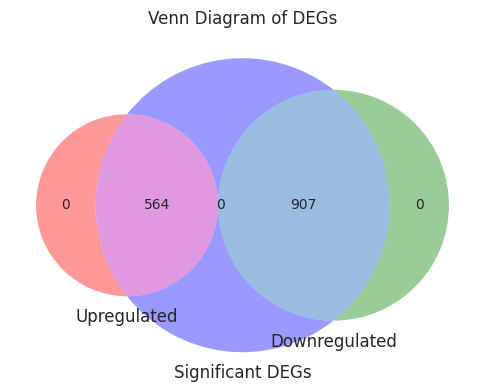

In [ ]:
plt.figure(figsize=(6, 6))
venn3([up_genes, down_genes, imp_degs], ('Upregulated', 'Downregulated','Significant DEGs'))
plt.title("Venn Diagram of DEGs")
plt.show()

In [ ]:
df_deg = deg_results
df_deg = df_deg.copy()

Calculate -log10(p-value)

In [ ]:
df_deg["-log10(p-value)"] = -np.log10(df_deg["p-value"])

Categorize genes as Upregulated or Downregulated

In [ ]:
df_deg["Regulation"] = np.where(df_deg["log2FC"] > 0, "Upregulated", "Downregulated")

Calculate -log10(p-value)

In [ ]:
df_deg["-log10(p-value)"] = -np.log10(df_deg["p-value"])

# Volcano Plot

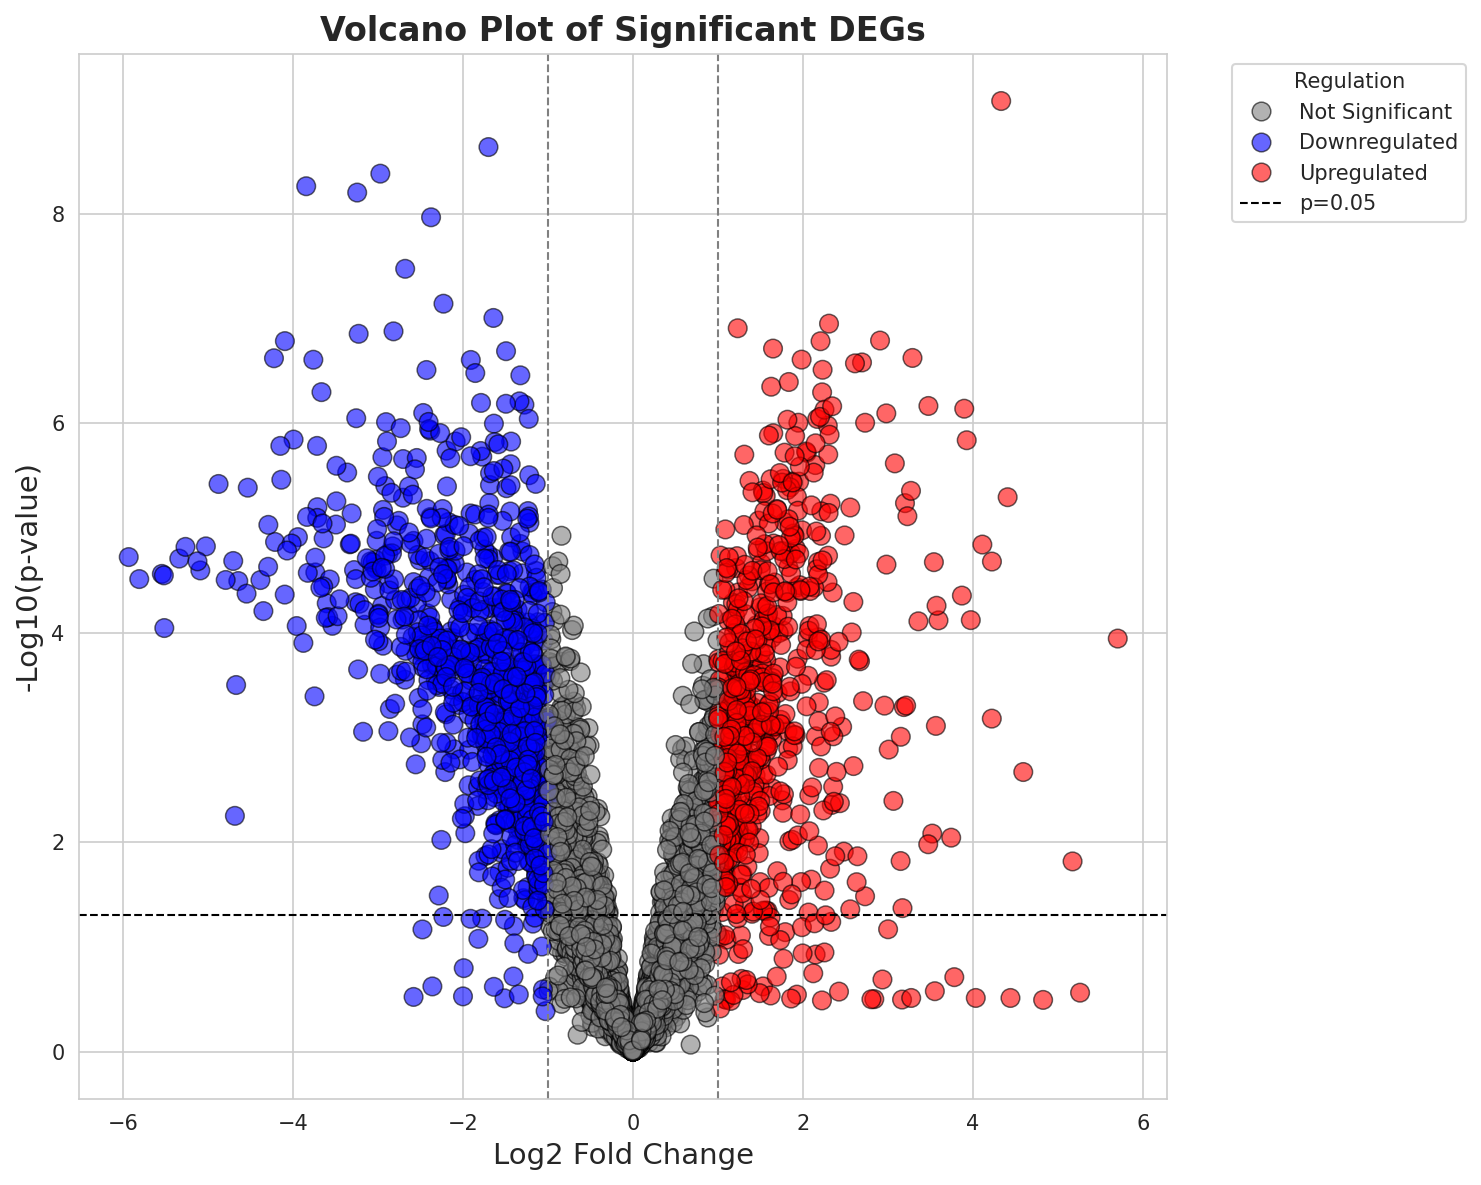

In [ ]:
pval_threshold = 0.05
fc_threshold = 1

df_deg["Regulation"] = np.where(df_deg["log2FC"] > fc_threshold, "Upregulated",
                        np.where(df_deg["log2FC"] < -fc_threshold, "Downregulated", "Not Significant"))

palette = {"Upregulated": "red", "Downregulated": "blue", "Not Significant": "gray"}

plt.figure(figsize=(10,8), dpi=150)
sns.set_style("whitegrid")

sns.scatterplot(data=df_deg, x="log2FC", y="-log10(p-value)", hue="Regulation",
                palette=palette, s=80, edgecolor="black", alpha=0.6)

plt.axhline(y=-np.log10(pval_threshold), linestyle="--", color="black", linewidth=1, label="p=0.05")
plt.axvline(x=fc_threshold, linestyle="--", color="gray", linewidth=1)
plt.axvline(x=-fc_threshold, linestyle="--", color="gray", linewidth=1)

plt.title("Volcano Plot of Significant DEGs", fontsize=16, fontweight="bold")
plt.xlabel("Log2 Fold Change", fontsize=14)
plt.ylabel("-Log10(p-value)", fontsize=14)

plt.legend(title="Regulation", fontsize=10, loc="upper left", frameon=True, bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.savefig("volcano_plot.png", dpi=150, bbox_inches="tight")

plt.show()

In [ ]:
files.download("volcano_plot.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>